mounting google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=[15,5]

#                   Loading dataset




In [ ]:

df = pd.read_csv('/content/drive/MyDrive/ds_lab/Medicalpremium.csv')
print('\nNumber of rows and columns in the data set: ',df.shape)
print('')
df.head()


Number of rows and columns in the data set:  (986, 11)



,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [ ]:
df.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [ ]:
df.columns


Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice'],
      dtype='object')

In [ ]:
len(df.columns)

11

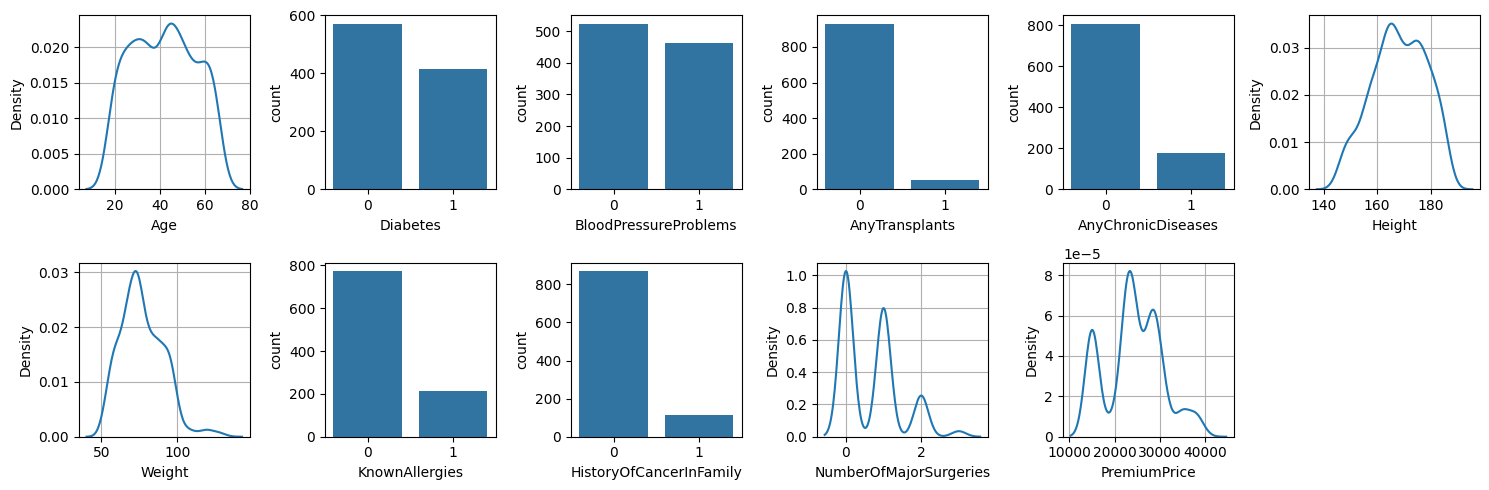

In [ ]:
r=2
c=6
it=1
for i in df.columns:
    plt.subplot(r,c,it)
    if df[i].nunique()<3:
        sns.countplot(x=df[i])
    else:
        sns.kdeplot(x=df[i])
        plt.grid()
    it+=1
plt.tight_layout()
plt.show()

<Axes: xlabel='PremiumPrice'>

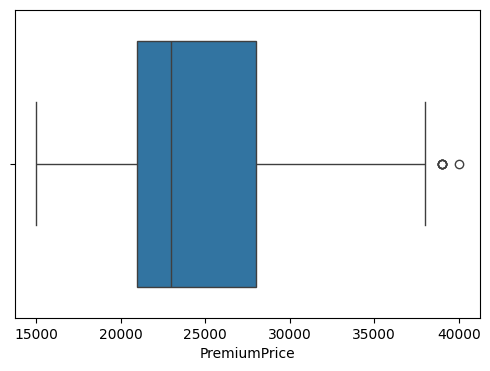

In [ ]:

plt.figure(figsize=(6, 4))
sns.boxplot(x=df['PremiumPrice'])

In [ ]:
df.nunique()


Age                        49
Diabetes                    2
BloodPressureProblems       2
AnyTransplants              2
AnyChronicDiseases          2
Height                     44
Weight                     74
KnownAllergies              2
HistoryOfCancerInFamily     2
NumberOfMajorSurgeries      4
PremiumPrice               24
dtype: int64

Scalling the dataset

In [ ]:
y=df['PremiumPrice']
x=df.drop('PremiumPrice',axis=1)
from sklearn.preprocessing import MinMaxScaler
mmax = MinMaxScaler()
x[['Age','Height','Weight','NumberOfMajorSurgeries']] = mmax.fit_transform(x[['Age','Height','Weight','NumberOfMajorSurgeries']])
x.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries
0,0.562500,0,0,0,0,0.232558,0.074074,0,0,0.000000
1,0.875000,1,0,0,0,0.813953,0.271605,0,0,0.000000
2,0.375000,1,1,0,0,0.302326,0.098765,0,0,0.333333
3,0.708333,1,1,0,1,0.883721,0.518519,0,0,0.666667
4,0.416667,0,0,0,1,0.488372,0.456790,0,0,0.333333


# **Comparing Different Regression Models**

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
lr=LinearRegression()
rf=RandomForestRegressor()
knn=KNeighborsRegressor()

In [ ]:
def predictor(model_name):
    print("For the {}".format(model_name))
    model_name.fit(xtrain, ytrain)
    y_pred_train = model_name.predict(xtrain)
    y_pred_test = model_name.predict(xtest)
    print("The TRAIN r2 score is", r2_score(ytrain, y_pred_train))
    print("The RMSE score for TRAIN data is", np.sqrt(mean_squared_error(ytrain, y_pred_train)))
    sns.kdeplot(ytrain, label='Actual')
    sns.kdeplot(y_pred_train, label='Predicted')
    plt.xlabel('Premium Price')
    plt.ylabel('Density')
    plt.grid()
    plt.legend()
    plt.show()
    print("--" * 50)
    print("The TEST r2 score is", r2_score(ytest, y_pred_test))
    print("The RMSE score for TEST data is", np.sqrt(mean_squared_error(ytest, y_pred_test)))
    sns.kdeplot(ytest, label='Actual')
    sns.kdeplot(y_pred_test, label='Predicted')
    plt.xlabel('Premium Price')
    plt.ylabel('Density')
    plt.grid()
    plt.legend()
    plt.show()


For the LinearRegression()
The TRAIN r2 score is 0.6035854178389605
The RMSE score for TRAIN data is 3821.1215452962074


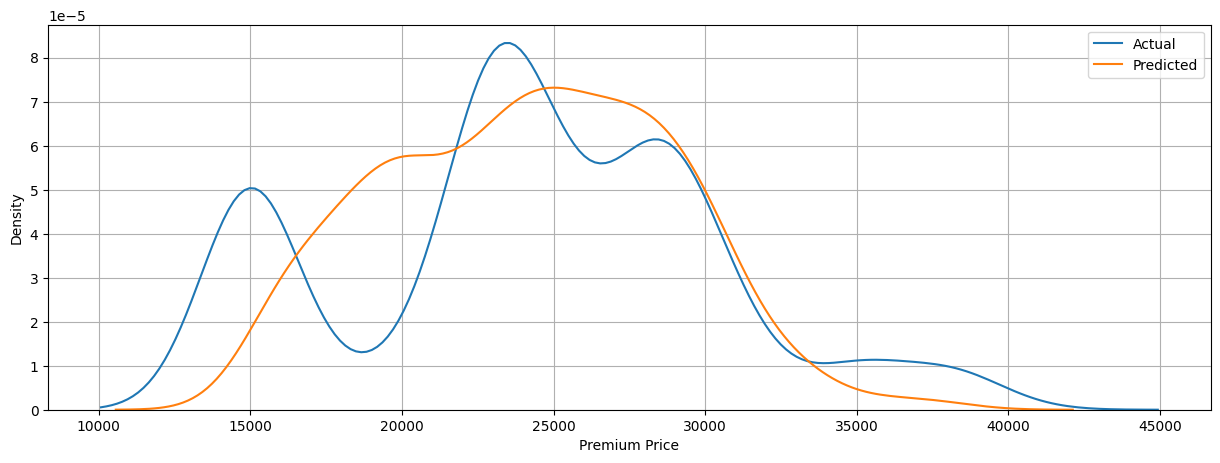

----------------------------------------------------------------------------------------------------
The TEST r2 score is 0.7070252058282106
The RMSE score for TEST data is 3584.0047746922423


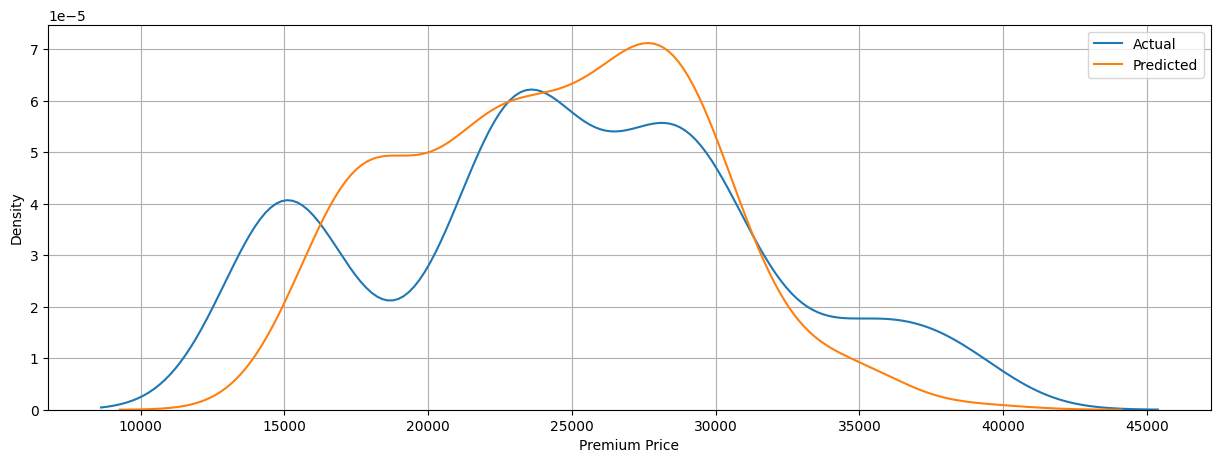

In [ ]:
predictor(lr)

For the RandomForestRegressor()
The TRAIN r2 score is 0.9642221672812409
The RMSE score for TRAIN data is 1147.950221109316


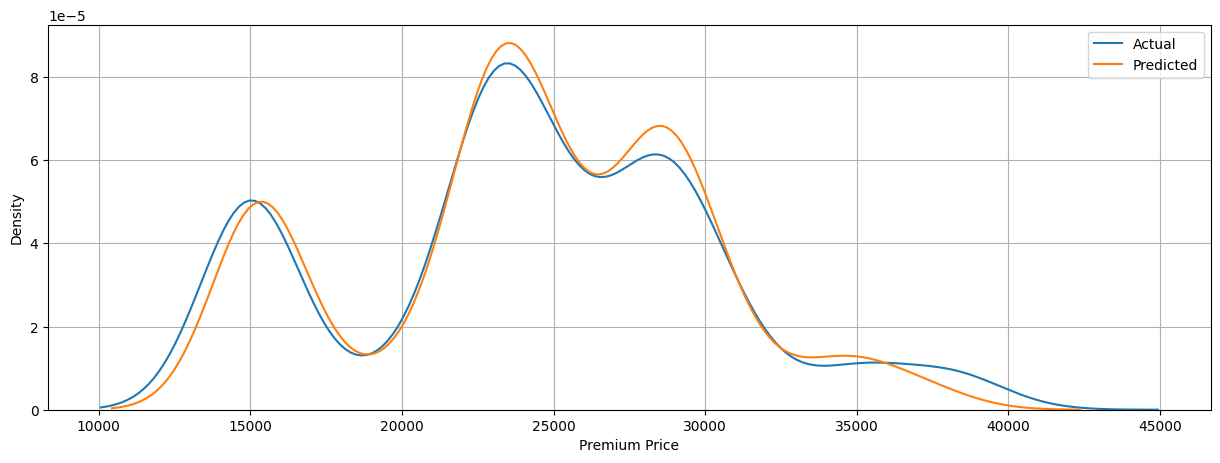

----------------------------------------------------------------------------------------------------
The TEST r2 score is 0.8424199397772744
The RMSE score for TEST data is 2628.4763981583847


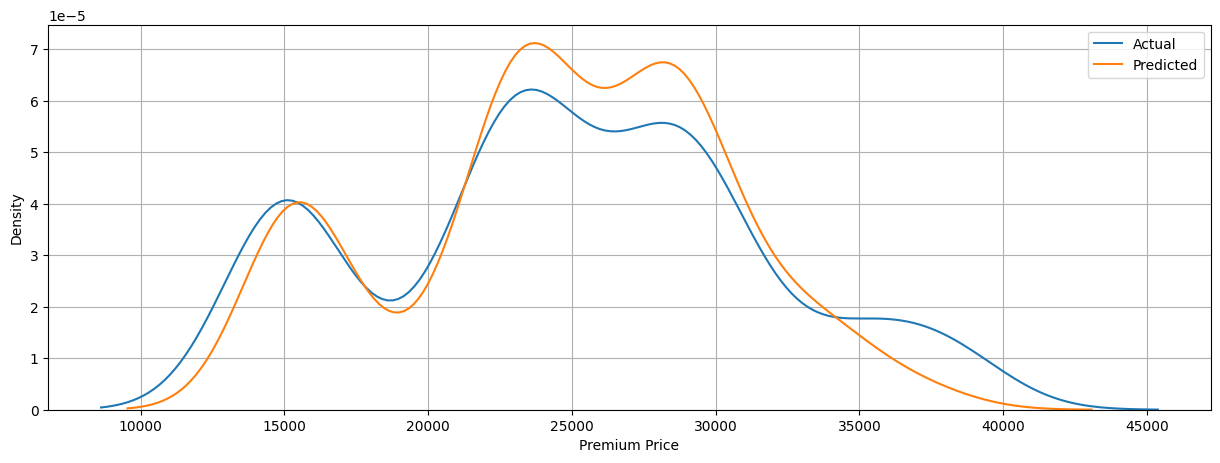

In [ ]:
predictor(rf)

For the KNeighborsRegressor()
The TRAIN r2 score is 0.6762349246455389
The RMSE score for TRAIN data is 3453.274018851583


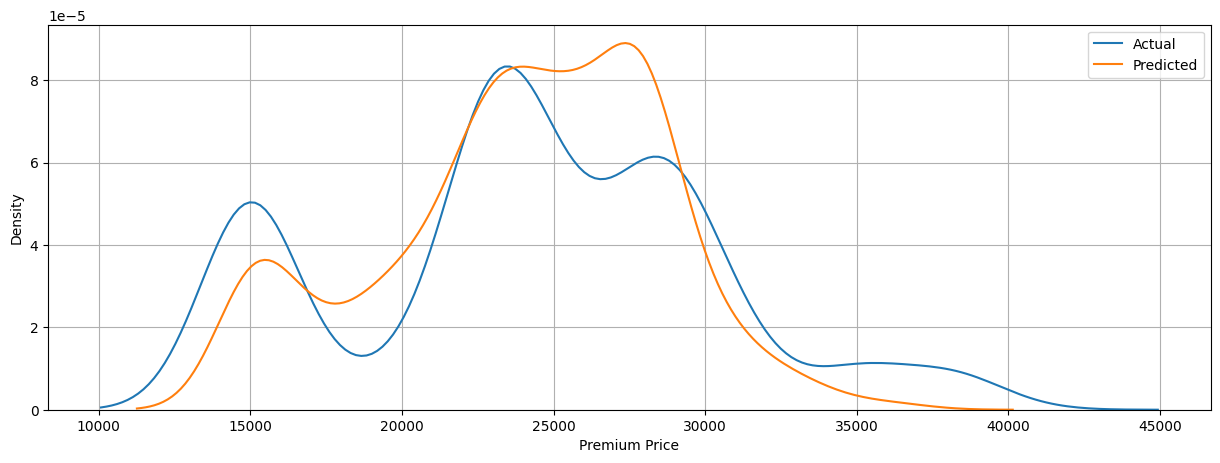

----------------------------------------------------------------------------------------------------
The TEST r2 score is 0.5521588417993719
The RMSE score for TEST data is 4431.139808220905


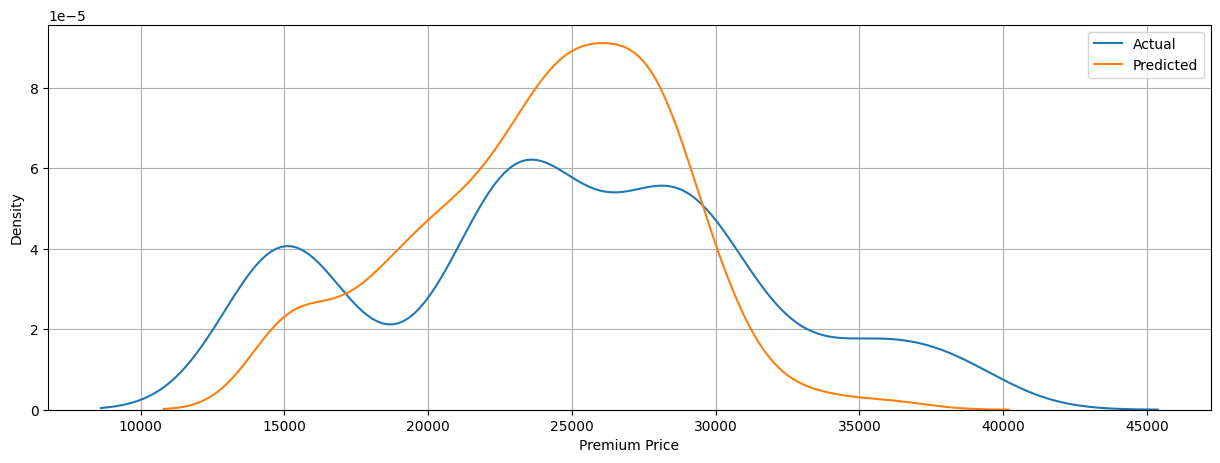

In [ ]:
predictor(knn)

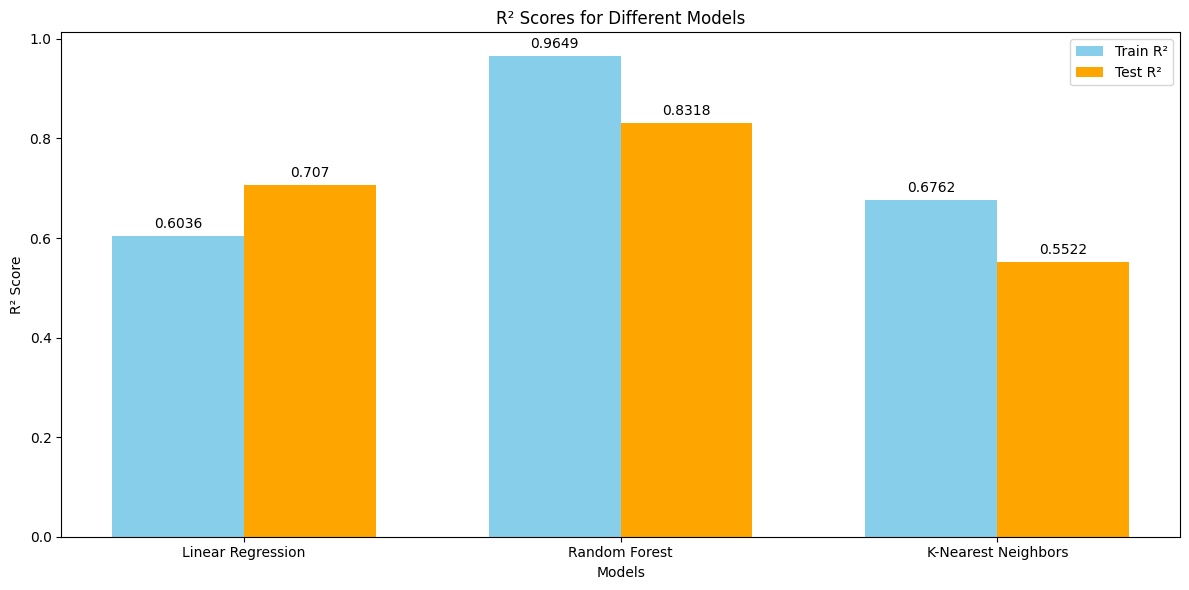

In [ ]:
models = ['Linear Regression', 'Random Forest', 'K-Nearest Neighbors']
train_r2 = [0.6036, 0.9649, 0.6762]
test_r2 = [0.7070, 0.8318, 0.5522]

fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.35
index = np.arange(len(models))

# Plotting R² Scores
bar1 = ax.bar(index - bar_width/2, train_r2, bar_width, label='Train R²', color='skyblue')
bar2 = ax.bar(index + bar_width/2, test_r2, bar_width, label='Test R²', color='orange')

ax.set_xlabel('Models')
ax.set_ylabel('R² Score')
ax.set_title('R² Scores for Different Models')
ax.set_xticks(index)
ax.set_xticklabels(models)
ax.legend()

# Adding RMSE Scores as text above the bars
for i in range(len(models)):
    ax.text(index[i] - bar_width/2, train_r2[i] + 0.01, str(train_r2[i]), ha='center', va='bottom')
    ax.text(index[i] + bar_width/2, test_r2[i] + 0.01, str(test_r2[i]), ha='center', va='bottom')

plt.tight_layout()
plt.show()

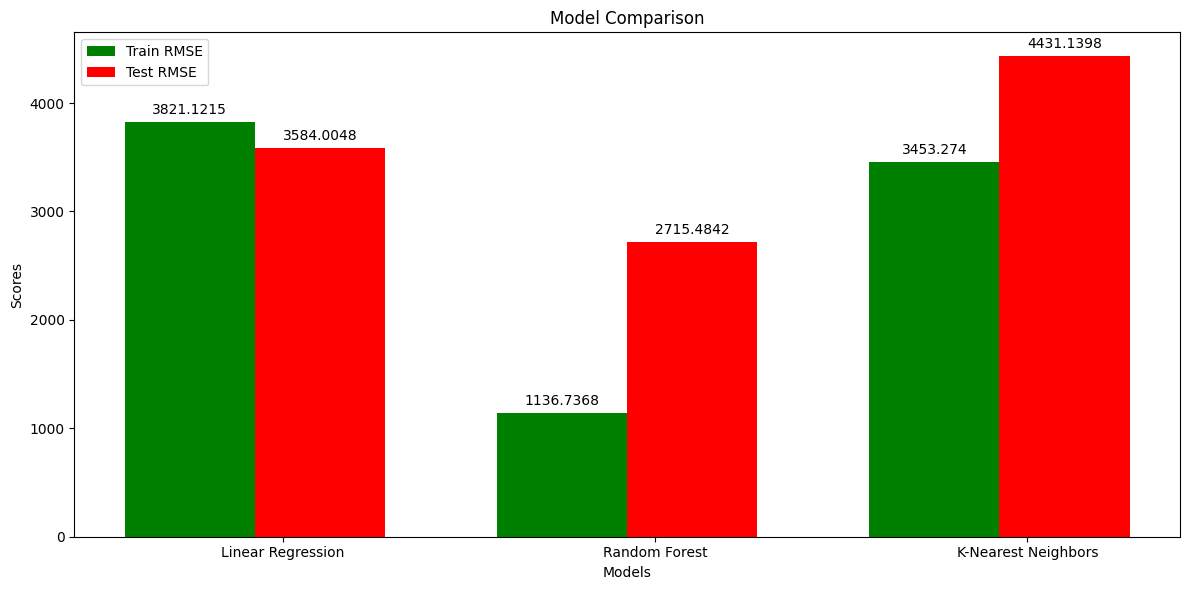

In [ ]:
models = ['Linear Regression', 'Random Forest', 'K-Nearest Neighbors']
train_rmse = [3821.1215, 1136.7368, 3453.2740]
test_rmse = [3584.0048, 2715.4842, 4431.1398]

fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.35
index = np.arange(len(models))

# Plotting RMSE Scores
bar3 = ax.bar(index + bar_width, train_rmse, bar_width, label='Train RMSE', color='green')
bar4 = ax.bar(index + 2*bar_width, test_rmse, bar_width, label='Test RMSE', color='red')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Comparison')
ax.set_xticks(index + bar_width + 0.5/ 2)
ax.set_xticklabels(models)
ax.legend()

# Adding R² and RMSE Scores as text above the bars
for i in range(len(models)):
    ax.text(index[i] + bar_width, train_rmse[i] + 50, str(train_rmse[i]), ha='center', va='bottom')
    ax.text(index[i] + 2*bar_width, test_rmse[i] + 50, str(test_rmse[i]), ha='center', va='bottom')

plt.tight_layout()
plt.show()

Implementing Model


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest model with the best hyperparameters
best_rf_model = RandomForestRegressor(n_estimators=300, max_depth=20, min_samples_split=2, min_samples_leaf=1, random_state=42)

# Train the model on the training data
best_rf_model.fit(input_train_data, output_train_data)

# Make predictions on the test data
predictions = best_rf_model.predict(input_test_data)

# Evaluate the model
rmse_test = np.sqrt(mse_test)
r2_test = best_rf_model.score(input_test_data, output_test_data)

print("Test Root Mean Squared Error:", rmse_test)
print("Test R-squared:", r2_test)


Test Root Mean Squared Error: 3201.6092071256157
Test R-squared: 0.7261868589693361


User Input for making prediction


In [ ]:
# Prompt user for input
while True:
    try:
        age = int(input("Enter age: "))
        if age < 0 or age > 120:  # Assuming a reasonable age range
            raise ValueError("Age must be between 0 and 120")
        break
    except ValueError:
        print("Invalid input. Please enter a valid age.")

diabetes_options = ['yes', 'no']
while True:
    diabetes = input("Do you have diabetes? (yes/no): ").lower()
    if diabetes in diabetes_options:
        diabetes = 1 if diabetes == "yes" else 0
        break
    else:
        print("Invalid input. Please enter 'yes' or 'no'.")

blood_pressure_options = ['yes', 'no']
while True:
    blood_pressure_problems = input("Do you have blood pressure problems? (yes/no): ").lower()
    if blood_pressure_problems in blood_pressure_options:
        blood_pressure_problems = 1 if blood_pressure_problems == "yes" else 0
        break
    else:
        print("Invalid input. Please enter 'yes' or 'no'.")

any_transplants_options = ['yes', 'no']
while True:
    any_transplants = input("Have you undergone any transplants? (yes/no): ").lower()
    if any_transplants in any_transplants_options:
        any_transplants = 1 if any_transplants == "yes" else 0
        break
    else:
        print("Invalid input. Please enter 'yes' or 'no'.")

any_chronic_diseases_options = ['yes', 'no']
while True:
    any_chronic_diseases = input("Do you have any chronic diseases? (yes/no): ").lower()
    if any_chronic_diseases in any_chronic_diseases_options:
        any_chronic_diseases = 1 if any_chronic_diseases == "yes" else 0
        break
    else:
        print("Invalid input. Please enter 'yes' or 'no'.")

while True:
    try:
        height = int(input("Enter height (in cm): "))
        if height <= 0:
            raise ValueError("Height must be a positive integer.")
        break
    except ValueError:
        print("Invalid input. Please enter a valid height.")

# Validate weight
while True:
    try:
        weight = int(input("Enter weight (in kg): "))
        if weight <= 0:
            raise ValueError("Weight must be a positive integer.")
        break
    except ValueError:
        print("Invalid input. Please enter a valid weight.")

# Validate known_allergies input
known_allergies_options = ['yes', 'no']
while True:
    known_allergies = input("Do you have any known allergies? (yes/no): ").lower()
    if known_allergies in known_allergies_options:
        known_allergies = 1 if known_allergies == "yes" else 0
        break
    else:
        print("Invalid input. Please enter 'yes' or 'no'.")

# Validate history_of_cancer_in_family input
history_of_cancer_in_family_options = ['yes', 'no']
while True:
    history_of_cancer_in_family = input("Is there a history of cancer in your family? (yes/no): ").lower()
    if history_of_cancer_in_family in history_of_cancer_in_family_options:
        history_of_cancer_in_family = 1 if history_of_cancer_in_family == "yes" else 0
        break
    else:
        print("Invalid input. Please enter 'yes' or 'no'.")

# Validate number_of_major_surgeries
while True:
    try:
        number_of_major_surgeries = int(input("Enter the number of major surgeries: "))
        if number_of_major_surgeries < 0:
            raise ValueError("Number of major surgeries must be a non-negative integer.")
        break
    except ValueError:
        print("Invalid input. Please enter a valid number of major surgeries.")

# Map yes/no answers to 0 and 1
diabetes = 1 if diabetes == "yes" else 0
blood_pressure_problems = 1 if blood_pressure_problems == "yes" else 0
any_transplants = 1 if any_transplants == "yes" else 0
any_chronic_diseases = 1 if any_chronic_diseases == "yes" else 0
known_allergies = 1 if known_allergies == "yes" else 0
history_of_cancer_in_family = 1 if history_of_cancer_in_family == "yes" else 0

# Create input data array
input_data = np.array([age, diabetes, blood_pressure_problems, any_transplants, any_chronic_diseases, height, weight, known_allergies, history_of_cancer_in_family, number_of_major_surgeries]).reshape(1, -1)

# Use the model to make predictions
predicted_value = best_rf_model.predict(input_data)[0]
print("Your insurance Premium is:", predicted_value)



Enter age: 20
Do you have diabetes? (yes/no): yes
Do you have blood pressure problems? (yes/no): yes
Have you undergone any transplants? (yes/no): yes
Do you have any chronic diseases? (yes/no): yes
Enter height (in cm): 164
Enter weight (in kg): 70
Do you have any known allergies? (yes/no): yes
Is there a history of cancer in your family? (yes/no): yes
Enter the number of major surgeries: 0
Your insurance Premium is: 33906.666666666664


Comparing Predicted and Actual values

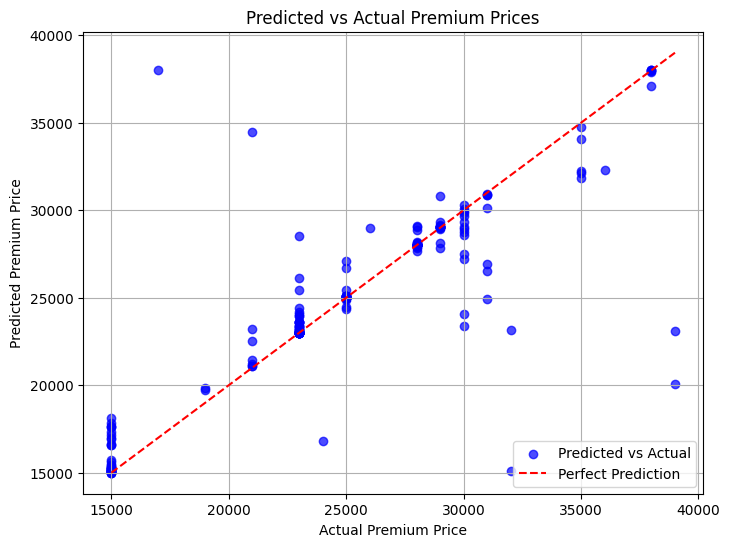

In [ ]:
# Plotting the graph of actual versus predicted values
# Make predictions on the test data
output_predicted = best_rf_model.predict(input_test_data)

# Create a DataFrame to store actual and predicted values
results = pd.DataFrame({'Actual': output_test_data, 'Predicted': output_predicted})

# Sort the results dataframe by the actual values for better visualization
results_sorted = results.sort_values(by='Actual')

plt.figure(figsize=(8, 6))
plt.scatter(results_sorted['Actual'], results_sorted['Predicted'], color='blue', label='Predicted vs Actual', alpha=0.7)
plt.plot([min(results_sorted['Actual']), max(results_sorted['Actual'])], [min(results_sorted['Actual']), max(results_sorted['Actual'])], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Premium Price')
plt.ylabel('Predicted Premium Price')
plt.title('Predicted vs Actual Premium Prices')
plt.legend()
plt.grid(True)
plt.show()